In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [233]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [234]:
#Import Data
df = pd.read_csv(r"/content/drive/My Drive/SIT720/yeast2vs4.csv")

In [235]:
print(df)

      mcg   gvh   alm   mit  erl  pox   vac   nuc     class
0    0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22  negative
1    0.40  0.39  0.60  0.15  0.5  0.0  0.58  0.30  negative
2    0.40  0.42  0.57  0.35  0.5  0.0  0.53  0.25  negative
3    0.46  0.44  0.52  0.11  0.5  0.0  0.50  0.22  negative
4    0.47  0.39  0.50  0.11  0.5  0.0  0.49  0.40  negative
..    ...   ...   ...   ...  ...  ...   ...   ...       ...
509  0.81  0.90  0.39  0.41  0.5  0.0  0.53  0.22  positive
510  0.83  0.53  0.52  0.20  0.5  0.0  0.48  0.25  positive
511  0.78  0.48  0.47  0.30  0.5  0.0  0.53  0.47  positive
512  0.72  0.56  0.40  0.26  0.5  0.0  0.51  0.26  positive
513  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22  positive

[514 rows x 9 columns]


**Preliminary EDA and Descriptive Statistics**

In [236]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class
0,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,negative
1,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,negative
2,0.40,0.42,0.57,0.35,0.5,0.0,0.53,0.25,negative
3,0.46,0.44,0.52,0.11,0.5,0.0,0.50,0.22,negative
4,0.47,0.39,0.50,0.11,0.5,0.0,0.49,0.40,negative


In [237]:
print(f"The amount of missing values is:\n{df.isnull().sum()}")

The amount of missing values is:
mcg      0
gvh      0
alm      0
mit      0
erl      0
pox      0
vac      0
nuc      0
class    0
dtype: int64


In [238]:
print(df.describe())

              mcg         gvh         alm         mit         erl         pox  \
count  514.000000  514.000000  514.000000  514.000000  514.000000  514.000000   
mean     0.504611    0.482763    0.523463    0.232607    0.504864    0.000973   
std      0.134528    0.103216    0.075013    0.117278    0.049122    0.022054   
min      0.190000    0.210000    0.270000    0.000000    0.500000    0.000000   
25%      0.410000    0.420000    0.490000    0.160000    0.500000    0.000000   
50%      0.490000    0.470000    0.520000    0.200000    0.500000    0.000000   
75%      0.580000    0.550000    0.560000    0.270000    0.500000    0.000000   
max      0.970000    0.900000    1.000000    1.000000    1.000000    0.500000   

              vac         nuc  
count  514.000000  514.000000  
mean     0.500467    0.256070  
std      0.063732    0.091569  
min      0.130000    0.000000  
25%      0.480000    0.220000  
50%      0.510000    0.220000  
75%      0.540000    0.270000  
max      0.730

In [239]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mcg     514 non-null    float64
 1   gvh     514 non-null    float64
 2   alm     514 non-null    float64
 3   mit     514 non-null    float64
 4   erl     514 non-null    float64
 5   pox     514 non-null    float64
 6   vac     514 non-null    float64
 7   nuc     514 non-null    float64
 8   class   514 non-null    object 
dtypes: float64(8), object(1)
memory usage: 36.3+ KB
None


Class 0: 463
Class 1: 51
Proportion: 9.08 : 1


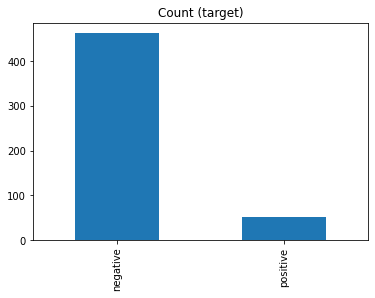

In [240]:
target_count = df['class'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [241]:
# Encode Categorical Label into Numerical
from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()

df['class'] = LabelEncoder.fit_transform(df['class'])

## Question 3 

In [242]:
#Finding the Pearson correlation in relation to the protein:
corrP1, _ = pearsonr(df['class'], df['mcg']) 
corrP2, _ = pearsonr(df['class'], df['gvh']) 
corrP3, _ = pearsonr(df['class'], df['alm'])  
corrP4, _ = pearsonr(df['class'], df['mit']) 
corrP5, _ = pearsonr(df['class'], df['erl'])
corrP6, _ = pearsonr(df['class'], df['pox'])
corrP7, _ = pearsonr(df['class'], df['vac']) 
corrP8, _ = pearsonr(df['class'], df['nuc']) 

#Finding the Pearson correlation in relation to the pressure:
print('Pearsons correlation with the mcg: %.3f' % corrP1)
print('Pearsons correlation with the gvh: %.3f' % corrP2)
print('Pearsons correlation with the alm: %.3f' % corrP3)
print('Pearsons correlation with the mit: %.3f' % corrP4)
print('Pearsons correlation with the erl: %.3f' % corrP5)
print('Pearsons correlation with the pox: %.3f' % corrP6)
print('Pearsons correlation with the vac: %.3f' % corrP7)
print('Pearsons correlation with the nuc: %.3f' % corrP8)
print('')
print('Maximum correlation with regard to protein localisation: ', corrP1)

Pearsons correlation with the mcg: 0.536
Pearsons correlation with the gvh: 0.387
Pearsons correlation with the alm: -0.481
Pearsons correlation with the mit: 0.141
Pearsons correlation with the erl: 0.033
Pearsons correlation with the pox: -0.015
Pearsons correlation with the vac: 0.051
Pearsons correlation with the nuc: -0.038

Maximum correlation with regard to protein localisation:  0.5357716041203007


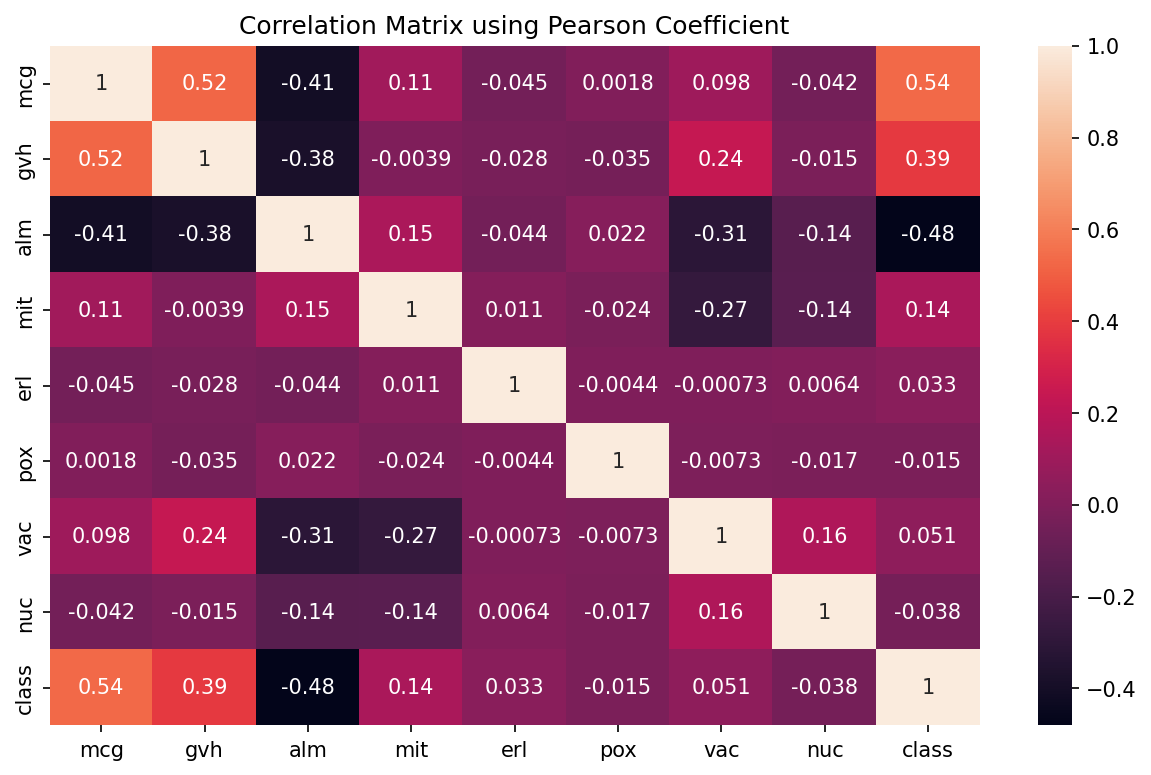

In [243]:
#Correlation Matrix
plt.figure(figsize=(10,6), dpi=150)
CorMatrix = df.corr(method='pearson')
sns.heatmap(CorMatrix, annot = True)
plt.title("Correlation Matrix using Pearson Coefficient")
plt.show()

Feature: 0  Score: 0.0
Feature: 1  Score: 0.00038910505836575737
Feature: 2  Score: 0.003112840466926059
Feature: 3  Score: 0.0038910505836575737
Feature: 4  Score: 0.005836575875486361
Feature: 5  Score: 0.01517509727626456
Feature: 6  Score: 0.028015564202334642
Feature: 7  Score: 0.07042801556420233


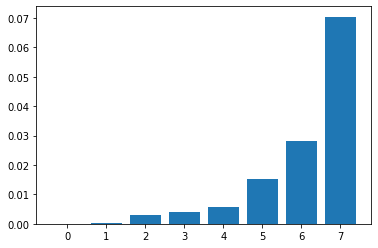

In [359]:
#Split the Data
y = df['class']
X = df.drop('class', axis=1)

# define the model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
importance=np.sort(importance)
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}  Score: {}' .format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))] ,importance)
plt.show()

##  Question 4 

## Preprocessing

In [314]:
# Prepare Data
Feature_Columns = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']


Label = pd.DataFrame(df['class'])
Features = df.drop('class', axis=1)

In [315]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Scaled_Feature = pd.DataFrame(scaler.fit_transform(Features), columns=Feature_Columns)

In [317]:
# Random Over-Sampling
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ROS.fit_resample(Scaled_Feature,Label)

In [318]:
# Split the Data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

In [319]:
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(620, 8)
(306, 8)
(620, 1)
(306, 1)


In [320]:
# Split Test and Val Data
x_val, x_test, y_val, y_test = train_test_split(Xtest, ytest, test_size=0.10)

In [321]:
print(x_val.shape)
print(x_test.shape)
print(y_val.shape)
print(y_test.shape)

(275, 8)
(31, 8)
(275, 1)
(31, 1)


### Linear Regression (with Lasso ,Ridge and ElasticNet Regularisation)

In [322]:
# Build the Model
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()

LinReg.fit(Xtrain, ytrain)

LinearRegression()

In [323]:
print("LinReg.coef_:", LinReg.coef_)
print("\nLinReg.intercept_:", LinReg.intercept_)

LinReg.coef_: [[ 0.1333017   0.04944368 -0.17387467  0.02656737  0.04757745 -0.00542966
  -0.00444303  0.00119823]]

LinReg.intercept_: [0.26074472]


In [324]:
print("Training set score:{:.2f}".format(LinReg.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(LinReg.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(LinReg.score(x_val, y_val)))

Training set score:0.60
Test set score:0.64
Validation set score: 0.63


In [325]:
y_pred = LinReg.predict(Xtest)

In [335]:
#Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_pred, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_pred, ytest))

Mean squared error: 0.09
Coefficient of determination: 0.40
Mean Absolute Error: 0.25


In [255]:
# Improve the Linear Regression Model by Ridge Regularisation
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.001).fit(Xtrain, ytrain)

print("Training set score:{:.2f}".format(ridge.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(ridge.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(ridge.score(x_val, y_val)))

Training set score:0.60
Test set score:0.64
Validation set score: 0.65


In [334]:
Ridge_pred = ridge.predict(Xtest)

#Evaluation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(Ridge_pred, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(Ridge_pred, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(Ridge_pred, ytest))

Mean squared error: 18.50
Coefficient of determination: -0.06
Mean Absolute Error: 3.30


In [256]:
#Improve Linear Regression model by LASSO regularisation 
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, max_iter=100000).fit(Xtrain, ytrain)

print("Training set score:{:.2f}".format(lasso.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(lasso.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(lasso.score(x_val, y_val)))

Training set score:0.60
Test set score:0.64
Validation set score: 0.65


In [294]:
pred_lasso = lasso.predict(Xtest)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(pred_lasso, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(pred_lasso, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_lasso, ytest))

Mean squared error: 0.09
Coefficient of determination: 0.36
Mean Absolute Error: 0.25


In [336]:
# Elastic Net
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.1, l1_ratio=0.5)
EN.fit(Xtrain, ytrain)

ElasticNet(alpha=0.1)

In [337]:
print("Training set score:{:.2f}".format(EN.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(EN.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(EN.score(x_val, y_val)))

Training set score:0.58
Test set score:0.62
Validation set score: 0.61


In [339]:
EN_pred = EN.predict(Xtest)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(EN_pred, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(EN_pred, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(EN_pred, ytest))

Mean squared error: 0.10
Coefficient of determination: 0.13
Mean Absolute Error: 0.26


Support Vector Machine Regression Model (with Grid Search)

In [257]:
from sklearn.svm import SVR

SVR_model = SVR(kernel='rbf', C=10)

SVR_model.fit(Xtrain, ytrain)

print("Training set score:{:.2f}".format(SVR_model.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(SVR_model.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(SVR_model.score(x_val, y_val)))

Training set score:0.85
Test set score:0.83
Validation set score: 0.84


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [258]:
y_pred_SVR = SVR_model.predict(Xtest)

In [259]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_pred_SVR, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_pred_SVR, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(y_pred_SVR, ytest))

Mean squared error: 0.04
Coefficient of determination: 0.81
Mean Absolute Error: 0.14


In [260]:
# Try to improve SVR using GridSearchCV
from sklearn.model_selection import GridSearchCV

SVM = SVR()
param_grid = {'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1, 5, 10, 100, 1000],
              'kernel': ['linear', 'rbf', 'sigmoid']}

grid = GridSearchCV(SVM, param_grid)

In [261]:
print(grid)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1, 5, 10, 100,
                               1000],
                         'kernel': ['linear', 'rbf', 'sigmoid']})


In [262]:
grid.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 0.2, 0.5, 0.7, 0.9, 1, 5, 10, 100,
                               1000],
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [263]:
print(grid.best_params_)

{'C': 100, 'kernel': 'rbf'}


In [264]:
# Apply best hyperparameters to new model

SVR_model2 = SVR(kernel='rbf', C=100)

SVR_model2.fit(Xtrain, ytrain)

print("Training set score:{:.2f}".format(SVR_model2.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(SVR_model2.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(SVR_model2.score(x_val, y_val)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training set score:0.88
Test set score:0.82
Validation set score: 0.83


In [265]:
y_pred_SVR2 = SVR_model2.predict(Xtest)

In [289]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest,y_pred_SVR2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytest, y_pred_SVR2))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(ytest, y_pred_SVR2))

Mean squared error: 0.04
Coefficient of determination: 0.82
Mean Absolute Error: 0.14


### Decision Tree

In [267]:
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn import tree

Tree = DecisionTreeRegressor()

Tree.fit(Xtrain, ytrain)

print("Training set score:{:.2f}".format(Tree.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(Tree.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(Tree.score(x_val, y_val)))

Training set score:1.00
Test set score:0.88
Validation set score: 0.91


In [268]:

print(tree.export_text(Tree))

|--- feature_2 <= 0.44
|   |--- feature_7 <= 0.40
|   |   |--- feature_0 <= 0.37
|   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  0.37
|   |   |   |--- feature_3 <= 0.11
|   |   |   |   |--- feature_0 <= 0.69
|   |   |   |   |   |--- value: [0.00]
|   |   |   |   |--- feature_0 >  0.69
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_3 >  0.11
|   |   |   |   |--- feature_0 <= 0.61
|   |   |   |   |   |--- feature_0 <= 0.58
|   |   |   |   |   |   |--- feature_0 <= 0.56
|   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |   |--- feature_0 >  0.56
|   |   |   |   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.47
|   |   |   |   |   |   |   |   |   |--- value: [0.00]
|   |   |   |   |   |   |   |   |--- feature_1 >  0.47
|   |   |   |   |   |   |   |   |   |--- value: [1.00]
|   |   |   |   |   |--- feature_0 

Text(0.5, 1.0, 'Decision Tree Model')

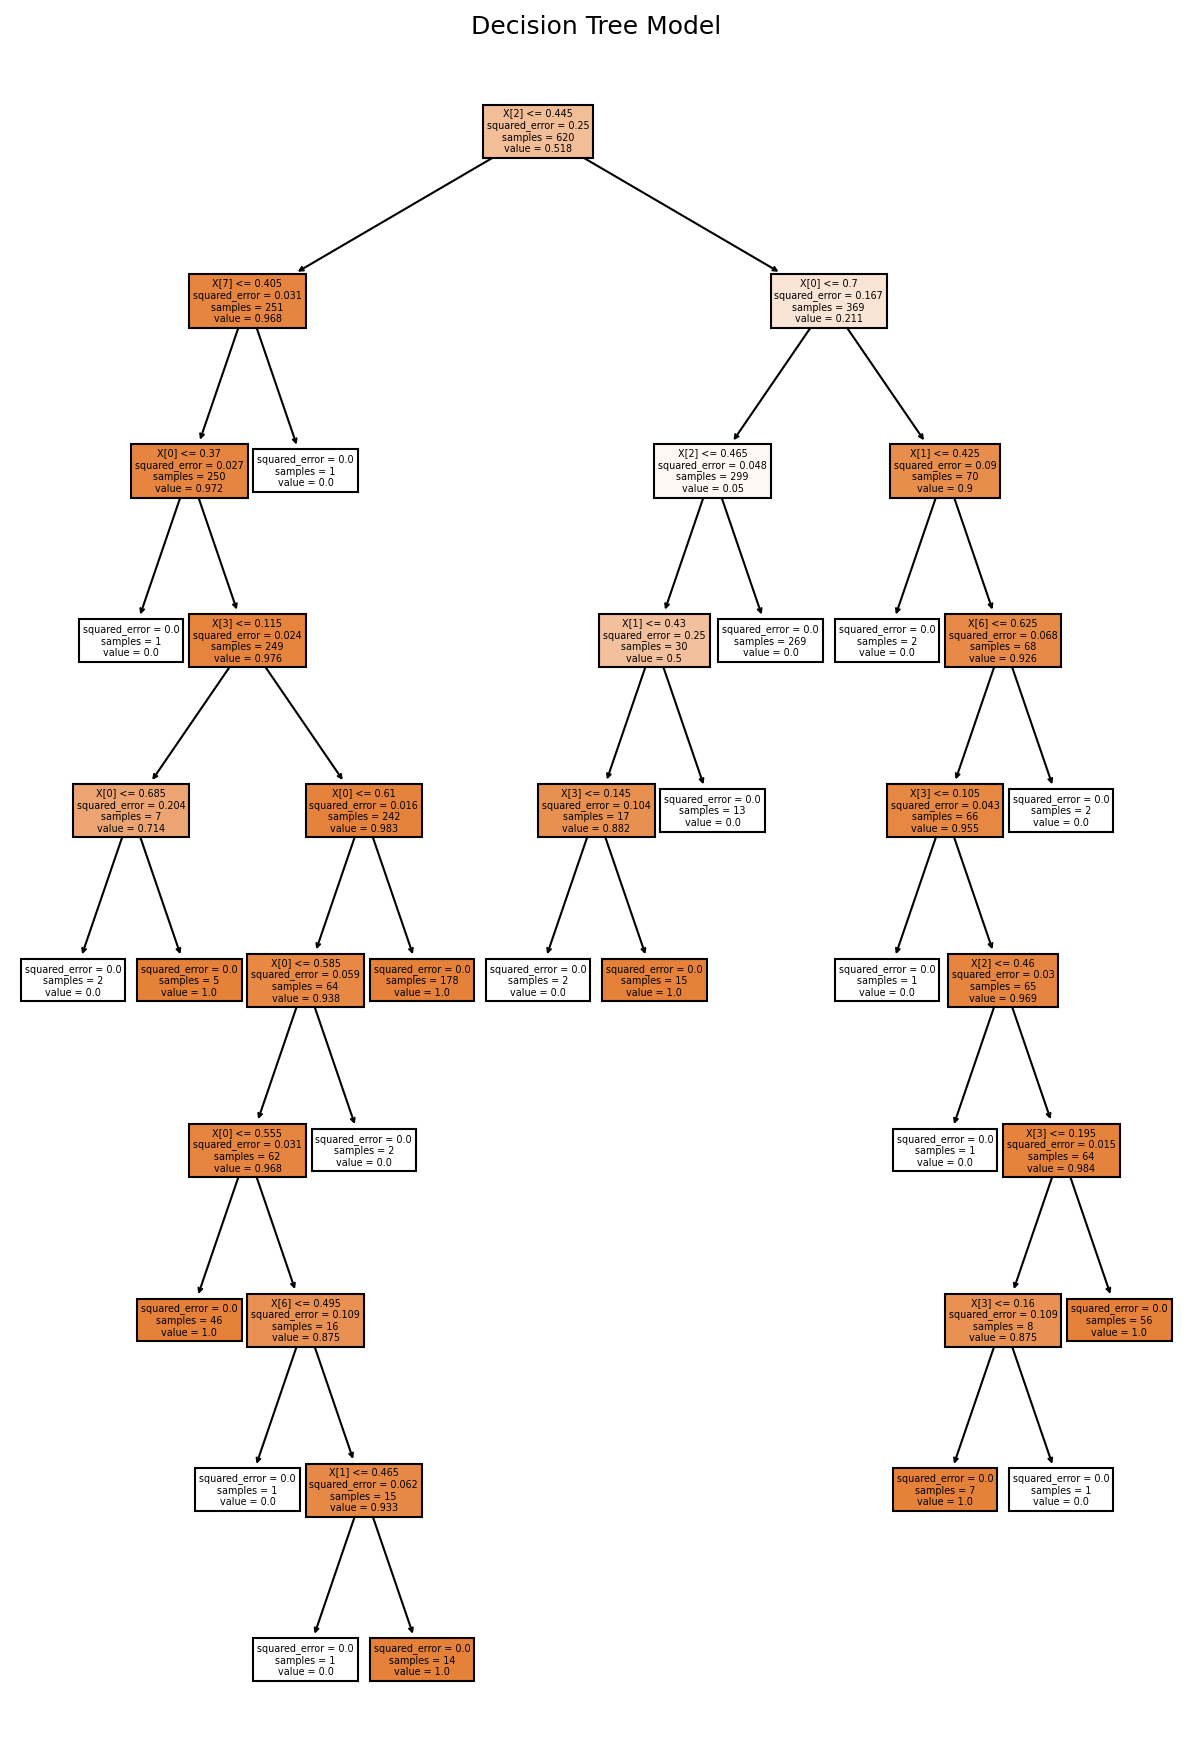

In [269]:
fig, ax = plt.subplots(figsize=(10,15), dpi=150)
tree.plot_tree(Tree, filled=True)
plt.title("Decision Tree Model")

In [270]:
pred_tree = Tree.predict(Xtest)

In [288]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(ytest, pred_tree))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(ytest, pred_tree))
# Mean Absolute Error
print("Mean Absolute Error: %.2f" % mean_absolute_error(ytest, pred_tree))

Mean squared error: 0.03
Coefficient of determination: 0.88
Mean Absolute Error: 0.03


In [272]:
# Try to Improve the model
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

Tree2 = DecisionTreeRegressor()

grid_cv = GridSearchCV(Tree2, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, cv=5).fit(Xtrain, ytrain)

pred_Tree2 = grid_cv.predict(Xtest)

In [273]:
print("Params: ", grid_cv.best_params_)
print("CV score :", grid_cv.best_score_)
print("Mean squared error: %.2f" % mean_squared_error(pred_Tree2, ytest))
print("Coefficient of determination: %.2f" % r2_score(pred_Tree2, ytest))
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_Tree2, ytest))


Params:  {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score : -0.014516129032258063
Mean squared error: 0.03
Coefficient of determination: 0.88
Mean Absolute Error: 0.03


In [342]:
# Apply Best Params to the Model
Tree3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf =1, min_samples_split =2)

Tree3_model = Tree3.fit(Xtrain, ytrain)

pred_Tree3 = Tree3_model.predict(Xtest)

In [343]:
print("Training set score:{:.2f}".format(Tree3_model.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(Tree3_model.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(Tree3_model.score(x_val, y_val)))

Training set score:1.00
Test set score:0.89
Validation set score: 0.90


In [344]:
print("Mean squared error: %.2f" % mean_squared_error(pred_Tree3, ytest))
print("Coefficient of determination: %.2f" % r2_score(pred_Tree3, ytest))
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_Tree3, ytest))

Mean squared error: 0.03
Coefficient of determination: 0.90
Mean Absolute Error: 0.03


In [276]:
print(tree.export_text(Tree3_model))

|--- feature_2 <= 0.44
|   |--- feature_0 <= 0.61
|   |   |--- feature_7 <= 0.25
|   |   |   |--- feature_3 <= 0.21
|   |   |   |   |--- feature_0 <= 0.56
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_0 >  0.56
|   |   |   |   |   |--- value: [0.83]
|   |   |   |--- feature_3 >  0.21
|   |   |   |   |--- value: [0.57]
|   |   |--- feature_7 >  0.25
|   |   |   |--- value: [0.56]
|   |--- feature_0 >  0.61
|   |   |--- value: [1.00]
|--- feature_2 >  0.44
|   |--- feature_0 <= 0.70
|   |   |--- feature_2 <= 0.47
|   |   |   |--- feature_1 <= 0.43
|   |   |   |   |--- feature_3 <= 0.17
|   |   |   |   |   |--- value: [0.78]
|   |   |   |   |--- feature_3 >  0.17
|   |   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_1 >  0.43
|   |   |   |   |--- value: [0.00]
|   |   |--- feature_2 >  0.47
|   |   |   |--- value: [0.00]
|   |--- feature_0 >  0.70
|   |   |--- feature_3 <= 0.22
|   |   |   |--- feature_0 <= 0.81
|   |   |   |   |--- value: [0.58]
|   |   | 

Text(0.5, 1.0, 'Decision Tree Model with Grid Search')

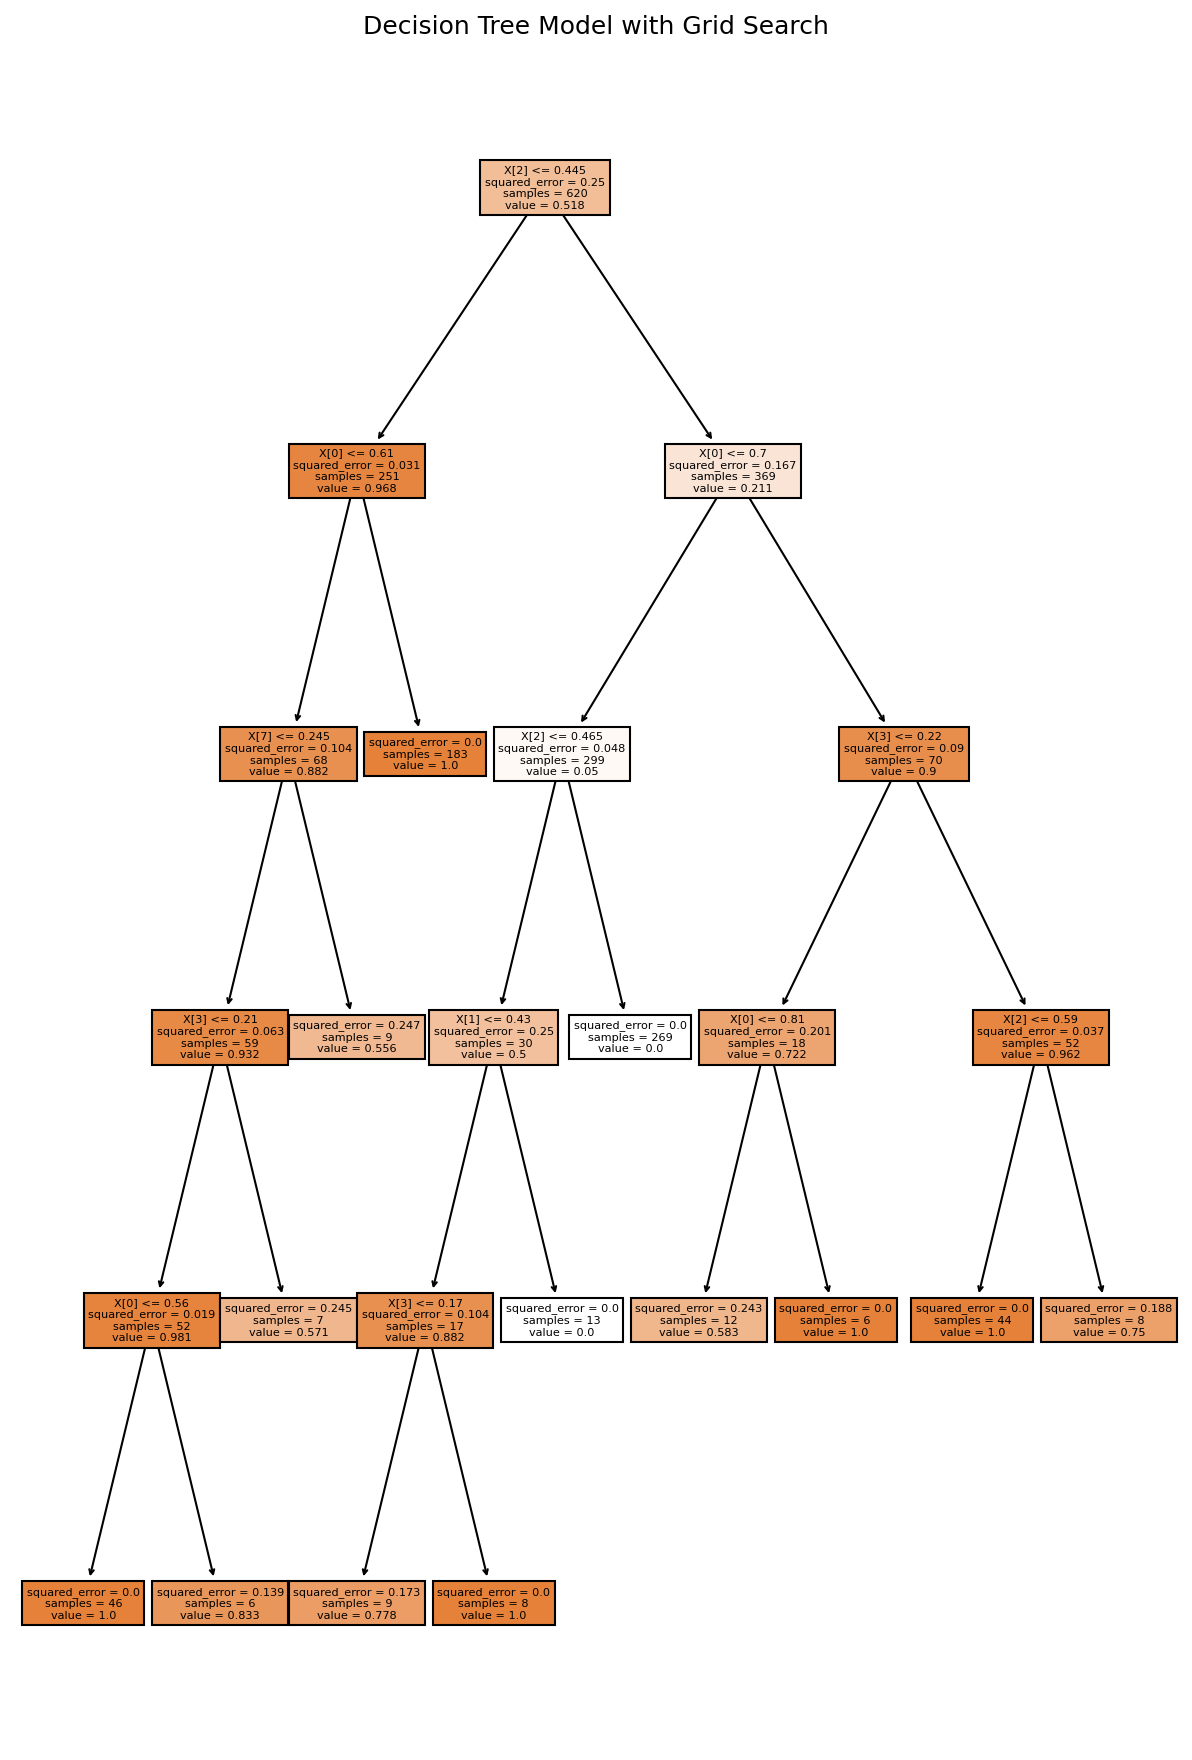

In [277]:
fig, ax = plt.subplots(figsize=(10,15), dpi=150)
tree.plot_tree(Tree3_model, filled=True)
plt.title("Decision Tree Model with Grid Search")

In [278]:
#Score 
print("Training set score:{:.2f}".format(Tree3_model.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(Tree3_model.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(Tree3_model.score(x_val, y_val)))

Training set score:0.93
Test set score:0.88
Validation set score: 0.91


In [279]:
#Evaluation

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(pred_Tree3, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(pred_Tree3, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_Tree3, ytest))

Mean squared error: 0.03
Coefficient of determination: 0.87
Mean Absolute Error: 0.04


## Question 5

Voting Regressor

In [280]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=5, random_state=42)
r3 = KNeighborsRegressor()

EnsembleRegressor = VotingRegressor([('LinReg', r1), ('Random Forest', r2), ('KNN', r3)])

EnsembleRegressor.fit(Xtrain, ytrain)


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_voting.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('LinReg', LinearRegression()),
                            ('Random Forest',
                             RandomForestRegressor(n_estimators=5,
                                                   random_state=42)),
                            ('KNN', KNeighborsRegressor())])

In [281]:
print("Training set score:{:.2f}".format(EnsembleRegressor.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(EnsembleRegressor.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(EnsembleRegressor.score(x_val, y_val)))

Training set score:0.93
Test set score:0.89
Validation set score: 0.91


In [282]:
pred_ER = EnsembleRegressor.predict(Xtest)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(pred_ER, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(pred_ER, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_ER, ytest))

Mean squared error: 0.03
Coefficient of determination: 0.86
Mean Absolute Error: 0.10


### Bagging


In [347]:
from sklearn.ensemble import BaggingRegressor

regr = BaggingRegressor(base_estimator=SVR(),n_estimators=5, random_state=42) #Using SVR as that was our best performing model in the individual model test

regr.fit(Xtrain, ytrain)

print("Training set score:{:.2f}".format(regr.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(regr.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(regr.score(x_val, y_val)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


Training set score:0.87
Test set score:0.84
Validation set score: 0.84


In [348]:
pred_regr = regr.predict(Xtest)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(pred_regr, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(pred_regr, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_regr, ytest))

Mean squared error: 0.04
Coefficient of determination: 0.81
Mean Absolute Error: 0.14


### Stacking

In [349]:
from sklearn.ensemble import StackingRegressor

estimators = [('LinReg', r1), ('Random Forest', r2), ('KNN', r3)]


StackReg = StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=3,random_state=42))

StackReg.fit(Xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_stacking.py:758: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


StackingRegressor(estimators=[('LinReg', LinearRegression()),
                              ('Random Forest',
                               RandomForestRegressor(n_estimators=5,
                                                     random_state=42)),
                              ('KNN', KNeighborsRegressor())],
                  final_estimator=RandomForestRegressor(n_estimators=3,
                                                        random_state=42))

In [350]:
print("Training set score:{:.2f}".format(StackReg.score(Xtrain, ytrain)))
print("Test set score:{:.2f}".format(StackReg.score(Xtest, ytest)))
print("Validation set score: {:.2f}".format(StackReg.score(x_val, y_val)))

Training set score:0.95
Test set score:0.87
Validation set score: 0.87


In [351]:
pred_stack = StackReg.predict(Xtest)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(pred_stack, ytest))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(pred_stack, ytest))
# The Mean absolute error
print("Mean Absolute Error: %.2f" % mean_absolute_error(pred_stack, ytest))

Mean squared error: 0.03
Coefficient of determination: 0.86
Mean Absolute Error: 0.04
